In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
bucket='riderdataset/dataset'
data_key = 'train.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

df = pd.read_csv(data_location)
df.head()

,1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด,1.1 พื้นที่ที่ท่านทำงาน,2. เพศ,2.1 อายุ,3. จำนวนคนที่ท่านต้องรับผิดชอบค่าใช้จ่าย,4. ระดับการศึกษา,5. ท่านมีรายได้เพียงพอหรือไม่,6. การเป็นไรเดอร์ คืออาชีพใดของท่าน,7. อาชีพเดิม/อาชีพปัจจุบันของท่าน,8.สวัสดิการหรือประกันสุขภาพที่ท่านมี (เลือกได้มากกว่า 1 ข้อ),...,เรียงลำดับสวัสดิการที่ท่านต้องการได้รับมากที่สุด (อันดับที่ 1 = ต้องการมากที่สุด / ถึงอันดับ 10) *ตัวเลขห้ามซ้ำกัน โปรดเช็คคำตอบของท่านอีกครั้งหากกดส่งแบบฟอร์มไม่ได้ [ระบบให้กู้ยืมดอกเบี้ยต่ำ และกู้ง่าย],เรียงลำดับสวัสดิการที่ท่านต้องการได้รับมากที่สุด (อันดับที่ 1 = ต้องการมากที่สุด / ถึงอันดับ 10) *ตัวเลขห้ามซ้ำกัน โปรดเช็คคำตอบของท่านอีกครั้งหากกดส่งแบบฟอร์มไม่ได้ [ประกันสุขภาพ],เรียงลำดับสวัสดิการที่ท่านต้องการได้รับมากที่สุด (อันดับที่ 1 = ต้องการมากที่สุด / ถึงอันดับ 10) *ตัวเลขห้ามซ้ำกัน โปรดเช็คคำตอบของท่านอีกครั้งหากกดส่งแบบฟอร์มไม่ได้ [ประกันอุบัติเหตุ ไม่ว่าจะอยู่ในเวลางานหรือไม่],เรียงลำดับสวัสดิการที่ท่านต้องการได้รับมากที่สุด (อันดับที่ 1 = ต้องการมากที่สุด / ถึงอันดับ 10) *ตัวเลขห้ามซ้ำกัน โปรดเช็คคำตอบของท่านอีกครั้งหากกดส่งแบบฟอร์มไม่ได้ [เงินทดแทนการขาดรายได้เมื่อเกิดอุบัติเหตุ],เรียงลำดับสวัสดิการที่ท่านต้องการได้รับมากที่สุด (อันดับที่ 1 = ต้องการมากที่สุด / ถึงอันดับ 10) *ตัวเลขห้ามซ้ำกัน โปรดเช็คคำตอบของท่านอีกครั้งหากกดส่งแบบฟอร์มไม่ได้ [เสื้อ กระเป๋า หมวกกันน็อค ฯลฯ ฟรี],เรียงลำดับสวัสดิการที่ท่านต้องการได้รับมากที่สุด (อันดับที่ 1 = ต้องการมากที่สุด / ถึงอันดับ 10) *ตัวเลขห้ามซ้ำกัน โปรดเช็คคำตอบของท่านอีกครั้งหากกดส่งแบบฟอร์มไม่ได้ [จุดพักรถ],เรียงลำดับสวัสดิการที่ท่านต้องการได้รับมากที่สุด (อันดับที่ 1 = ต้องการมากที่สุด / ถึงอันดับ 10) *ตัวเลขห้ามซ้ำกัน โปรดเช็คคำตอบของท่านอีกครั้งหากกดส่งแบบฟอร์มไม่ได้ [เงินชดเชยเมื่อถูกเลิกจ้าง],ความต้องการอื่นๆ [ท่านจะเข้าร่วมสหภาพแรงงาน (ถ้ามี)],ความต้องการอื่นๆ [อยากให้มีกฎหมายกำกับแพลตฟอร์ม],ความต้องการอื่นๆ [ถ้ามีโอกาส จะเปลี่ยนอาชีพ]
0,แกร็บฟู้ด,กรุงเทพมหานคร,ชาย,23-30 ปี,แค่ตัวเอง,ปริญญาตรี,เหลือใช้ และมีไว้เก็บ,อาชีพเสริม,พนักงานบริษัทเอกชน,ซื้อประกันสุขภาพเอง,...,7,2.0,1.0,3.0,6.0,5,4.0,ใช่,คิดดูก่อน,ใช่
1,แกร็บฟู้ด,กรุงเทพมหานคร,ชาย,23-30 ปี,3-4 คน,ปวส,พอใช้จ่าย,อาชีพหลัก,รับจ้างทั่วไป,บัตรทอง,...,6,5.0,4.0,3.0,2.0,"1, 10",8.0,คิดดูก่อน,คิดดูก่อน,ใช่
2,แกร็บฟู้ด,กรุงเทพมหานคร,ชาย,23-30 ปี,แค่ตัวเอง,ปริญญาตรี,เหลือใช้ และมีไว้เก็บ,อาชีพเสริม,อิสระ,"เป็นผู้ประกันตนมาตรา 33, ประกันอุบัติเหคุ",...,6,4.0,9.0,1.0,3.0,2,8.0,ใช่,ใช่,ใช่
3,แกร็บฟู้ด,กรุงเทพมหานคร,ชาย,31-40 ปี,แค่ตัวเอง,มัธยมศึกษา,พอใช้จ่าย,อาชีพหลัก,พนักงานบริษัทเอกชน,เป็นผู้ประกันตนมาตรา 39/40,...,4,3.0,7.0,8.0,9.0,10,2.0,ใช่,ใช่,ใช่
4,แกร็บฟู้ด,กรุงเทพมหานคร,หญิง,31-40 ปี,3-4 คน,NaN,พอใช้จ่าย,อาชีพหลัก,ทั่วไป,เป็นผู้ประกันตนมาตรา 33,...,5,7.0,6.0,1.0,2.0,3,4.0,คิดดูก่อน,ใช่,ไม่ใช่


In [ ]:
cols = ['1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด','3. จำนวนคนที่ท่านต้องรับผิดชอบค่าใช้จ่าย','6. การเป็นไรเดอร์ คืออาชีพใดของท่าน ',
        '9.รายได้ของท่าน จากการเป็นไรเดอร์/ต่อเดือน','10.ประสบการณ์ในการทำงานเป็นไรเดอร์ ','11.ระยะเวลาที่ท่านทำงานในแต่ละวัน ',
        '12.จำนวนรอบที่ขับได้ในแต่ละวัน ','13.ตั้งแต่ทำงานเป็นไรเดอร์ ท่านเคยประสบอุบัติเหตุกี่ครั้ง ','14.แพลตฟอร์มที่ท่านคิดว่าดีที่สุดในสายตาของท่าน ',
        'กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การแบ่งโซนรับงาน]',
       'กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การให้ค่ารอบมาก-น้อยตามพื้นที่]',
       'กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบเลื่อนขั้น]',
       'กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบป้อนงาน]',
       'กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ความคุ้มค่าของค่าจ้าง]',
       'กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบการจ่ายโบนัส]',
       'กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย]',
       'กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน]',]
df[cols].head()

,1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด,3. จำนวนคนที่ท่านต้องรับผิดชอบค่าใช้จ่าย,6. การเป็นไรเดอร์ คืออาชีพใดของท่าน,9.รายได้ของท่าน จากการเป็นไรเดอร์/ต่อเดือน,10.ประสบการณ์ในการทำงานเป็นไรเดอร์,11.ระยะเวลาที่ท่านทำงานในแต่ละวัน,12.จำนวนรอบที่ขับได้ในแต่ละวัน,13.ตั้งแต่ทำงานเป็นไรเดอร์ ท่านเคยประสบอุบัติเหตุกี่ครั้ง,14.แพลตฟอร์มที่ท่านคิดว่าดีที่สุดในสายตาของท่าน,กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบจีพีเอส],...,กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ความง่ายในการติดต่อคอลเซนเตอร์],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ความคุ้มค่าของค่าจ้าง],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบการจ่ายค่าจ้าง],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบการจ่ายโบนัส],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [เงื่อนไขในการเคลมอาหารคืน],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การจ่ายค่าเสียเวลารอลูกค้า],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การจ่ายค่าเสียเวลารอร้านอาหาร],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบสำรองจ่ายค่าอาหาร เมื่อลูกค้าจ่ายเงินสด]
0,แกร็บฟู้ด,แค่ตัวเอง,อาชีพเสริม,"15,001–20,000 บาท",6 เดือน – 1 ปี,6 – 8 ชั่วโมง,11 – 16 รอบ,น้อยกว่า 4 ครั้ง,ไลน์แมน,พอใจ,...,ไม่พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,ไม่พอใจ,ไม่พอใจมาก,เฉยๆ,ไม่พอใจ,ไม่พอใจ,พอใจ
1,แกร็บฟู้ด,3-4 คน,อาชีพหลัก,"15,001–20,000 บาท",1 – 3 ปี,มากกว่า 8 ชั่วโมง,มากกว่า 16 รอบ,น้อยกว่า 4 ครั้ง,แกร็บฟู้ด,พอใจ,...,ไม่พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,ไม่พอใจ,ไม่พอใจ,เฉยๆ,ไม่พอใจ,ไม่พอใจ,เฉยๆ
2,แกร็บฟู้ด,แค่ตัวเอง,อาชีพเสริม,"15,001–20,000 บาท",น้อยกว่า 6 เดือน,6 – 8 ชั่วโมง,11 – 16 รอบ,น้อยกว่า 4 ครั้ง,แกร็บฟู้ด,พอใจมาก,...,ไม่พอใจมาก,เฉยๆ,พอใจ,เฉยๆ,ไม่พอใจ,ไม่พอใจ,เฉยๆ,ไม่พอใจมาก,ไม่พอใจมาก,พอใจ
3,แกร็บฟู้ด,แค่ตัวเอง,อาชีพหลัก,"10,001 – 15,000บาท",6 เดือน – 1 ปี,มากกว่า 8 ชั่วโมง,มากกว่า 16 รอบ,ไม่เคย,แกร็บฟู้ด,เฉยๆ,...,ไม่พอใจมาก,ไม่พอใจ,เฉยๆ,NaN,ไม่พอใจ,ไม่พอใจมาก,พอใจ,ไม่พอใจมาก,ไม่พอใจมาก,เฉยๆ
4,แกร็บฟู้ด,3-4 คน,อาชีพหลัก,"10,001 – 15,000บาท",1 – 3 ปี,6 – 8 ชั่วโมง,5 - 10 รอบ,น้อยกว่า 4 ครั้ง,แกร็บฟู้ด,พอใจมาก,...,พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,พอใจ,เฉยๆ,พอใจ,เฉยๆ,เฉยๆ,พอใจ


In [ ]:
df_grab = df[df['1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด'] == 'แกร็บฟู้ด']
df_grab[cols].head()

,1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด,3. จำนวนคนที่ท่านต้องรับผิดชอบค่าใช้จ่าย,6. การเป็นไรเดอร์ คืออาชีพใดของท่าน,9.รายได้ของท่าน จากการเป็นไรเดอร์/ต่อเดือน,10.ประสบการณ์ในการทำงานเป็นไรเดอร์,11.ระยะเวลาที่ท่านทำงานในแต่ละวัน,12.จำนวนรอบที่ขับได้ในแต่ละวัน,13.ตั้งแต่ทำงานเป็นไรเดอร์ ท่านเคยประสบอุบัติเหตุกี่ครั้ง,14.แพลตฟอร์มที่ท่านคิดว่าดีที่สุดในสายตาของท่าน,กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบจีพีเอส],...,กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ความง่ายในการติดต่อคอลเซนเตอร์],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ความคุ้มค่าของค่าจ้าง],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบการจ่ายค่าจ้าง],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบการจ่ายโบนัส],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [เงื่อนไขในการเคลมอาหารคืน],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การจ่ายค่าเสียเวลารอลูกค้า],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การจ่ายค่าเสียเวลารอร้านอาหาร],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบสำรองจ่ายค่าอาหาร เมื่อลูกค้าจ่ายเงินสด]
0,แกร็บฟู้ด,แค่ตัวเอง,อาชีพเสริม,"15,001–20,000 บาท",6 เดือน – 1 ปี,6 – 8 ชั่วโมง,11 – 16 รอบ,น้อยกว่า 4 ครั้ง,ไลน์แมน,พอใจ,...,ไม่พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,ไม่พอใจ,ไม่พอใจมาก,เฉยๆ,ไม่พอใจ,ไม่พอใจ,พอใจ
1,แกร็บฟู้ด,3-4 คน,อาชีพหลัก,"15,001–20,000 บาท",1 – 3 ปี,มากกว่า 8 ชั่วโมง,มากกว่า 16 รอบ,น้อยกว่า 4 ครั้ง,แกร็บฟู้ด,พอใจ,...,ไม่พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,ไม่พอใจ,ไม่พอใจ,เฉยๆ,ไม่พอใจ,ไม่พอใจ,เฉยๆ
2,แกร็บฟู้ด,แค่ตัวเอง,อาชีพเสริม,"15,001–20,000 บาท",น้อยกว่า 6 เดือน,6 – 8 ชั่วโมง,11 – 16 รอบ,น้อยกว่า 4 ครั้ง,แกร็บฟู้ด,พอใจมาก,...,ไม่พอใจมาก,เฉยๆ,พอใจ,เฉยๆ,ไม่พอใจ,ไม่พอใจ,เฉยๆ,ไม่พอใจมาก,ไม่พอใจมาก,พอใจ
3,แกร็บฟู้ด,แค่ตัวเอง,อาชีพหลัก,"10,001 – 15,000บาท",6 เดือน – 1 ปี,มากกว่า 8 ชั่วโมง,มากกว่า 16 รอบ,ไม่เคย,แกร็บฟู้ด,เฉยๆ,...,ไม่พอใจมาก,ไม่พอใจ,เฉยๆ,NaN,ไม่พอใจ,ไม่พอใจมาก,พอใจ,ไม่พอใจมาก,ไม่พอใจมาก,เฉยๆ
4,แกร็บฟู้ด,3-4 คน,อาชีพหลัก,"10,001 – 15,000บาท",1 – 3 ปี,6 – 8 ชั่วโมง,5 - 10 รอบ,น้อยกว่า 4 ครั้ง,แกร็บฟู้ด,พอใจมาก,...,พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,พอใจ,เฉยๆ,พอใจ,เฉยๆ,เฉยๆ,พอใจ


In [ ]:
df_foodpanda = df[df['1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด'] == 'ฟู้ดแพนด้า']
df_foodpanda[cols].head()

,1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด,3. จำนวนคนที่ท่านต้องรับผิดชอบค่าใช้จ่าย,6. การเป็นไรเดอร์ คืออาชีพใดของท่าน,9.รายได้ของท่าน จากการเป็นไรเดอร์/ต่อเดือน,10.ประสบการณ์ในการทำงานเป็นไรเดอร์,11.ระยะเวลาที่ท่านทำงานในแต่ละวัน,12.จำนวนรอบที่ขับได้ในแต่ละวัน,13.ตั้งแต่ทำงานเป็นไรเดอร์ ท่านเคยประสบอุบัติเหตุกี่ครั้ง,14.แพลตฟอร์มที่ท่านคิดว่าดีที่สุดในสายตาของท่าน,กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบจีพีเอส],...,กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ความง่ายในการติดต่อคอลเซนเตอร์],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ความคุ้มค่าของค่าจ้าง],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบการจ่ายค่าจ้าง],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบการจ่ายโบนัส],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [เงื่อนไขในการเคลมอาหารคืน],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การจ่ายค่าเสียเวลารอลูกค้า],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การจ่ายค่าเสียเวลารอร้านอาหาร],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบสำรองจ่ายค่าอาหาร เมื่อลูกค้าจ่ายเงินสด]
29,ฟู้ดแพนด้า,แค่ตัวเอง,อาชีพหลัก,"มากกว่า 30,000 บาท",มากกว่า 3 ปี,มากกว่า 8 ชั่วโมง,มากกว่า 16 รอบ,11 – 16 ครั้ง,ฟู้ดแพนด้า,พอใจมาก,...,พอใจมาก,พอใจมาก,พอใจมาก,พอใจมาก,พอใจมาก,พอใจมาก,พอใจมาก,พอใจมาก,พอใจมาก,พอใจมาก
36,ฟู้ดแพนด้า,2 คน,อาชีพเสริม,"10,001 – 15,000บาท",น้อยกว่า 6 เดือน,3 – 5 ชั่วโมง,5 - 10 รอบ,น้อยกว่า 4 ครั้ง,ฟู้ดแพนด้า,พอใจ,...,ไม่พอใจ,ไม่พอใจ,ไม่พอใจ,เฉยๆ,พอใจ,พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ
40,ฟู้ดแพนด้า,2 คน,อาชีพหลัก,"15,001–20,000 บาท",5 ปี,มากกว่า 8 ชั่วโมง,มากกว่า 16 รอบ,มากกว่า 16 ครั้ง,แกร็บฟู้ด,พอใจมาก,...,พอใจ,พอใจ,พอใจ,พอใจ,เฉยๆ,เฉยๆ,พอใจ,พอใจ,เฉยๆ,เฉยๆ
41,ฟู้ดแพนด้า,2 คน,อาชีพเสริม,"10,001 – 15,000บาท",1 – 3 ปี,3 – 5 ชั่วโมง,5 - 10 รอบ,น้อยกว่า 4 ครั้ง,แกร็บฟู้ด,พอใจ,...,พอใจ,เฉยๆ,เฉยๆ,ไม่พอใจ,เฉยๆ,เฉยๆ,ไม่พอใจ,ไม่พอใจ,ไม่พอใจ,ไม่พอใจ
42,ฟู้ดแพนด้า,2 คน,อาชีพหลัก,"15,001–20,000 บาท",1 – 3 ปี,6 – 8 ชั่วโมง,11 – 16 รอบ,น้อยกว่า 4 ครั้ง,แกร็บฟู้ด,พอใจ,...,เฉยๆ,เฉยๆ,พอใจ,พอใจ,เฉยๆ,เฉยๆ,พอใจ,พอใจ,พอใจ,พอใจ


In [ ]:
df_lineman = df[df['1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด'] == 'ไลน์แมน']
df_lineman[cols].head()

,1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด,3. จำนวนคนที่ท่านต้องรับผิดชอบค่าใช้จ่าย,6. การเป็นไรเดอร์ คืออาชีพใดของท่าน,9.รายได้ของท่าน จากการเป็นไรเดอร์/ต่อเดือน,10.ประสบการณ์ในการทำงานเป็นไรเดอร์,11.ระยะเวลาที่ท่านทำงานในแต่ละวัน,12.จำนวนรอบที่ขับได้ในแต่ละวัน,13.ตั้งแต่ทำงานเป็นไรเดอร์ ท่านเคยประสบอุบัติเหตุกี่ครั้ง,14.แพลตฟอร์มที่ท่านคิดว่าดีที่สุดในสายตาของท่าน,กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบจีพีเอส],...,กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ความง่ายในการติดต่อคอลเซนเตอร์],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ความคุ้มค่าของค่าจ้าง],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบการจ่ายค่าจ้าง],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบการจ่ายโบนัส],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [เงื่อนไขในการเคลมอาหารคืน],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การจ่ายค่าเสียเวลารอลูกค้า],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การจ่ายค่าเสียเวลารอร้านอาหาร],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบสำรองจ่ายค่าอาหาร เมื่อลูกค้าจ่ายเงินสด]
31,ไลน์แมน,2 คน,อาชีพหลัก,"มากกว่า 20,001 บาท",-,-,-,-,ไลน์แมน,พอใจ,...,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ
32,ไลน์แมน,2 คน,อาชีพหลัก,"15,001–20,000 บาท",มากกว่า 3 ปี,6 – 8 ชั่วโมง,11 – 16 รอบ,น้อยกว่า 4 ครั้ง,ไลน์แมน,เฉยๆ,...,เฉยๆ,ไม่พอใจ,ไม่พอใจ,ไม่พอใจ,เฉยๆ,พอใจ,พอใจ,พอใจ,พอใจ,เฉยๆ
34,ไลน์แมน,2 คน,อาชีพเสริม,"มากกว่า 20,001 บาท",6 เดือน – 1 ปี,3 – 5 ชั่วโมง,11 – 16 รอบ,น้อยกว่า 4 ครั้ง,ไลน์แมน,พอใจมาก,...,พอใจ,พอใจมาก,พอใจมาก,พอใจมาก,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ
38,ไลน์แมน,แค่ตัวเอง,อาชีพเสริม,"10,001 – 15,000บาท",1 – 3 ปี,3 – 5 ชั่วโมง,5 - 10 รอบ,น้อยกว่า 4 ครั้ง,ฟู้ดแพนด้า,เฉยๆ,...,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ
44,ไลน์แมน,3-4 คน,อาชีพหลัก,"15,001–20,000 บาท",มากกว่า 3 ปี,มากกว่า 8 ชั่วโมง,มากกว่า 16 รอบ,5 - 10 ครั้ง,ไลน์แมน,พอใจ,...,ไม่พอใจ,เฉยๆ,เฉยๆ,ไม่พอใจ,เฉยๆ,เฉยๆ,พอใจ,เฉยๆ,เฉยๆ,เฉยๆ


In [ ]:
df_gojek = df[df['1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด'] == 'โกเจ็ก']
df_gojek[cols].head()

,1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด,3. จำนวนคนที่ท่านต้องรับผิดชอบค่าใช้จ่าย,6. การเป็นไรเดอร์ คืออาชีพใดของท่าน,9.รายได้ของท่าน จากการเป็นไรเดอร์/ต่อเดือน,10.ประสบการณ์ในการทำงานเป็นไรเดอร์,11.ระยะเวลาที่ท่านทำงานในแต่ละวัน,12.จำนวนรอบที่ขับได้ในแต่ละวัน,13.ตั้งแต่ทำงานเป็นไรเดอร์ ท่านเคยประสบอุบัติเหตุกี่ครั้ง,14.แพลตฟอร์มที่ท่านคิดว่าดีที่สุดในสายตาของท่าน,กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบจีพีเอส],...,กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ความง่ายในการติดต่อคอลเซนเตอร์],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ความคุ้มค่าของค่าจ้าง],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบการจ่ายค่าจ้าง],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบการจ่ายโบนัส],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [เงื่อนไขในการเคลมอาหารคืน],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การจ่ายค่าเสียเวลารอลูกค้า],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การจ่ายค่าเสียเวลารอร้านอาหาร],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบสำรองจ่ายค่าอาหาร เมื่อลูกค้าจ่ายเงินสด]
30,โกเจ็ก,2 คน,อาชีพเสริม,"15,001–20,000 บาท",1 – 3 ปี,มากกว่า 8 ชั่วโมง,มากกว่า 16 รอบ,5 - 10 ครั้ง,แกร็บฟู้ด,พอใจมาก,...,ไม่พอใจมาก,เฉยๆ,เฉยๆ,เฉยๆ,พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,ไม่พอใจ,ไม่พอใจ
37,โกเจ็ก,2 คน,อาชีพเสริม,"10,001 – 15,000บาท",6 เดือน – 1 ปี,3 – 5 ชั่วโมง,5 - 10 รอบ,5 - 10 ครั้ง,ฟู้ดแพนด้า,พอใจ,...,เฉยๆ,พอใจ,พอใจมาก,พอใจมาก,พอใจ,เฉยๆ,พอใจ,พอใจ,พอใจ,พอใจ
60,โกเจ็ก,แค่ตัวเอง,อาชีพเสริม,"15,001–20,000 บาท",1 – 3 ปี,6 – 8 ชั่วโมง,11 – 16 รอบ,น้อยกว่า 4 ครั้ง,แกร็บฟู้ด,พอใจ,...,ไม่พอใจ,ไม่พอใจ,ไม่พอใจ,ไม่พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ
62,โกเจ็ก,2 คน,อาชีพเสริม,"10,001 – 15,000บาท",6 เดือน – 1 ปี,3 – 5 ชั่วโมง,5 - 10 รอบ,น้อยกว่า 4 ครั้ง,แกร็บฟู้ด,พอใจ,...,เฉยๆ,เฉยๆ,พอใจ,พอใจ,พอใจ,เฉยๆ,เฉยๆ,ไม่พอใจ,เฉยๆ,เฉยๆ
319,โกเจ็ก,แค่ตัวเอง,อาชีพหลัก,"10,001 – 15,000บาท",6 เดือน – 1 ปี,มากกว่า 8 ชั่วโมง,11 – 16 รอบ,5 - 10 ครั้ง,ไลน์แมน,พอใจ,...,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ


In [ ]:
df_robin = df[df['1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด'] == 'โรบินฮู้ด']
df_robin[cols].head()

,1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด,3. จำนวนคนที่ท่านต้องรับผิดชอบค่าใช้จ่าย,6. การเป็นไรเดอร์ คืออาชีพใดของท่าน,9.รายได้ของท่าน จากการเป็นไรเดอร์/ต่อเดือน,10.ประสบการณ์ในการทำงานเป็นไรเดอร์,11.ระยะเวลาที่ท่านทำงานในแต่ละวัน,12.จำนวนรอบที่ขับได้ในแต่ละวัน,13.ตั้งแต่ทำงานเป็นไรเดอร์ ท่านเคยประสบอุบัติเหตุกี่ครั้ง,14.แพลตฟอร์มที่ท่านคิดว่าดีที่สุดในสายตาของท่าน,กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบจีพีเอส],...,กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ความง่ายในการติดต่อคอลเซนเตอร์],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ความคุ้มค่าของค่าจ้าง],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบการจ่ายค่าจ้าง],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบการจ่ายโบนัส],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [เงื่อนไขในการเคลมอาหารคืน],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การจ่ายค่าเสียเวลารอลูกค้า],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การจ่ายค่าเสียเวลารอร้านอาหาร],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบสำรองจ่ายค่าอาหาร เมื่อลูกค้าจ่ายเงินสด]
49,โรบินฮู้ด,2 คน,อาชีพเสริม,"10,001 – 15,000บาท",6 เดือน – 1 ปี,3 – 5 ชั่วโมง,5 - 10 รอบ,น้อยกว่า 4 ครั้ง,ไลน์แมน,พอใจ,...,เฉยๆ,ไม่พอใจ,ไม่พอใจ,ไม่พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,ไม่พอใจ,ไม่พอใจ
58,โรบินฮู้ด,2 คน,อาชีพเสริม,"15,001–20,000 บาท",1 – 3 ปี,6 – 8 ชั่วโมง,11 – 16 รอบ,5 - 10 ครั้ง,โรบินฮู้ด,พอใจมาก,...,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,ไม่พอใจ,ไม่พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ
564,โรบินฮู้ด,2 คน,อาชีพหลัก,"มากกว่า 20,001 บาท",มากกว่า 3 ปี,มากกว่า 8 ชั่วโมง,มากกว่า 16 รอบ,น้อยกว่า 4 ครั้ง,โรบินฮู้ด,พอใจมาก,...,พอใจมาก,พอใจ,พอใจ,พอใจมาก,เฉยๆ,ไม่พอใจ,เฉยๆ,ไม่พอใจมาก,ไม่พอใจมาก,พอใจ
566,โรบินฮู้ด,2 คน,อาชีพหลัก,"15,001–20,000 บาท",มากกว่า 3 ปี,6 – 8 ชั่วโมง,11 – 16 รอบ,น้อยกว่า 4 ครั้ง,โรบินฮู้ด,พอใจ,...,พอใจ,พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,พอใจ,ไม่พอใจ,ไม่พอใจ,พอใจ
592,โรบินฮู้ด,2 คน,อาชีพหลัก,"15,001–20,000 บาท",1 – 3 ปี,มากกว่า 8 ชั่วโมง,11 – 16 รอบ,น้อยกว่า 4 ครั้ง,แกร็บฟู้ด,พอใจ,...,เฉยๆ,พอใจ,พอใจ,พอใจ,เฉยๆ,เฉยๆ,ไม่พอใจ,เฉยๆ,เฉยๆ,พอใจมาก


In [ ]:
df_other = df[df['1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด'] == 'ไม่ระบุ']
df_other[cols].head()

,1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด,3. จำนวนคนที่ท่านต้องรับผิดชอบค่าใช้จ่าย,6. การเป็นไรเดอร์ คืออาชีพใดของท่าน,9.รายได้ของท่าน จากการเป็นไรเดอร์/ต่อเดือน,10.ประสบการณ์ในการทำงานเป็นไรเดอร์,11.ระยะเวลาที่ท่านทำงานในแต่ละวัน,12.จำนวนรอบที่ขับได้ในแต่ละวัน,13.ตั้งแต่ทำงานเป็นไรเดอร์ ท่านเคยประสบอุบัติเหตุกี่ครั้ง,14.แพลตฟอร์มที่ท่านคิดว่าดีที่สุดในสายตาของท่าน,กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบจีพีเอส],...,กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ความง่ายในการติดต่อคอลเซนเตอร์],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ความคุ้มค่าของค่าจ้าง],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบการจ่ายค่าจ้าง],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบการจ่ายโบนัส],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [เงื่อนไขในการเคลมอาหารคืน],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การจ่ายค่าเสียเวลารอลูกค้า],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [การจ่ายค่าเสียเวลารอร้านอาหาร],กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้ [ระบบสำรองจ่ายค่าอาหาร เมื่อลูกค้าจ่ายเงินสด]
195,ไม่ระบุ,3-4 คน,อาชีพเสริม,"น้อยกว่า 5,000 บาท",6 เดือน – 1 ปี,3 – 5 ชั่วโมง,5 - 10 รอบ,ไม่ระบุ,ฟู้ดแพนด้า,พอใจ,...,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ
294,ไม่ระบุ,แค่ตัวเอง,อาชีพหลัก,"10,001 – 15,000บาท",6 เดือน – 1 ปี,มากกว่า 8 ชั่วโมง,มากกว่า 16 รอบ,5 - 10 ครั้ง,ไลน์แมน,เฉยๆ,...,ไม่พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ,พอใจ
588,ไม่ระบุ,แค่ตัวเอง,อาชีพหลัก,"15,001–20,000 บาท",มากกว่า 3 ปี,มากกว่า 8 ชั่วโมง,11 – 16 รอบ,5 - 10 ครั้ง,ฟู้ดแพนด้า,พอใจ,...,พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,ไม่พอใจ,ไม่พอใจ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ
602,ไม่ระบุ,แค่ตัวเอง,อาชีพหลัก,"15,001–20,000 บาท",5 ปี,6 – 8 ชั่วโมง,11 – 16 รอบ,5 - 10 ครั้ง,ฟู้ดแพนด้า,พอใจ,...,พอใจมาก,ไม่พอใจ,พอใจ,เฉยๆ,ไม่พอใจมาก,ไม่พอใจมาก,ไม่พอใจมาก,ไม่พอใจ,ไม่พอใจ,ไม่พอใจมาก
616,ไม่ระบุ,2 คน,อาชีพหลัก,"15,001–20,000 บาท",6 เดือน – 1 ปี,มากกว่า 8 ชั่วโมง,11 – 16 รอบ,11 – 16 ครั้ง,แกร็บฟู้ด,พอใจมาก,...,ไม่พอใจ,เฉยๆ,เฉยๆ,ไม่พอใจ,ไม่พอใจ,ไม่พอใจ,ไม่พอใจมาก,ไม่พอใจ,ไม่พอใจมาก,เฉยๆ


In [ ]:
foodpanda = df[df['1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด'] == 'ฟู้ดแพนด้า']
foodpanda[rider].count()

1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด    426
dtype: int64

In [ ]:
lineman = df[df['1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด'] == 'ไลน์แมน']
lineman[rider].count()

1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด    291
dtype: int64

In [ ]:
gojek = df[df['1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด'] == 'โกเจ็ก']
gojek[rider].count()

1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด    50
dtype: int64

In [ ]:
robin = df[df['1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด'] == 'โรบินฮู้ด']
robin[rider].count()

1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด    27
dtype: int64

In [ ]:
other = df[df['1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด'] == 'ไม่ระบุ']
other[rider].count()

1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด    19
dtype: int64

In [ ]:
mpl.__version__

'3.3.4'

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size=12)
plt = mpl.pyplot

<AxesSubplot:xlabel='count', ylabel='1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด'>

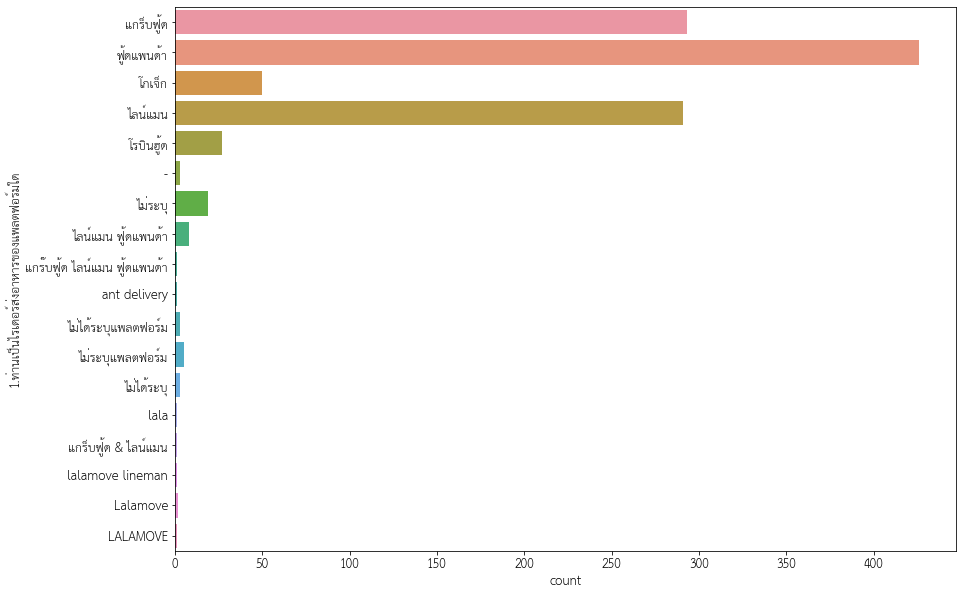

In [ ]:
f,ax= plt.subplots(figsize=(14,10))
sns.countplot(y='1.ท่านเป็นไรเดอร์ส่งอาหารของแพลตฟอร์มใด',data=df)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การแบ่งโซนรับงาน]', ylabel='count'>

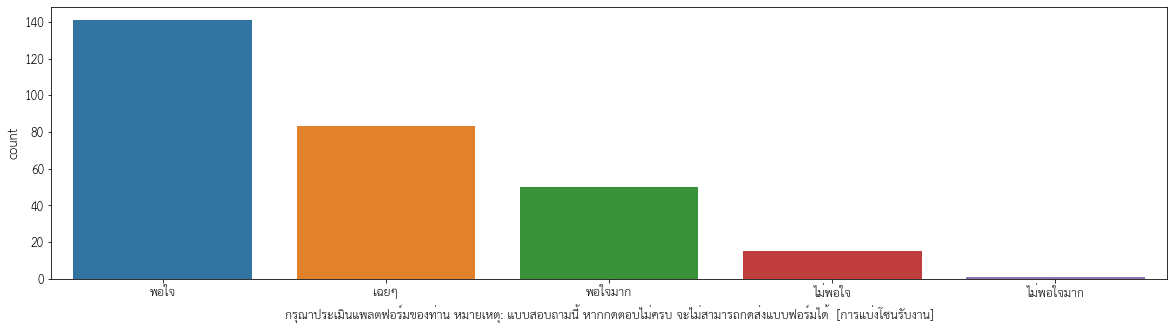

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การแบ่งโซนรับงาน]',data=df_grab)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การให้ค่ารอบมาก-น้อยตามพื้นที่]', ylabel='count'>

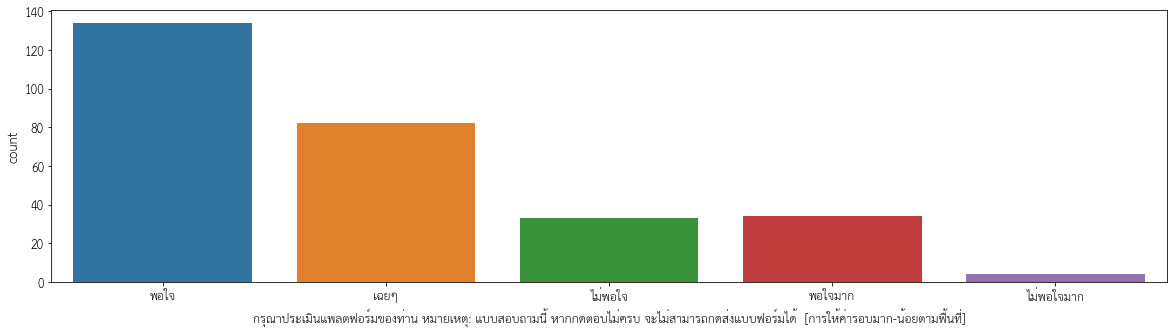

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การให้ค่ารอบมาก-น้อยตามพื้นที่]',data=df_grab)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบเลื่อนขั้น]', ylabel='count'>

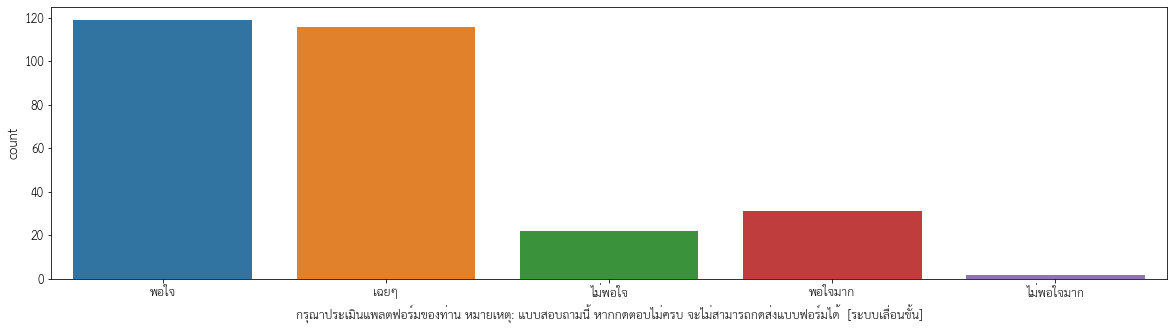

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบเลื่อนขั้น]',data=df_grab)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบป้อนงาน]', ylabel='count'>

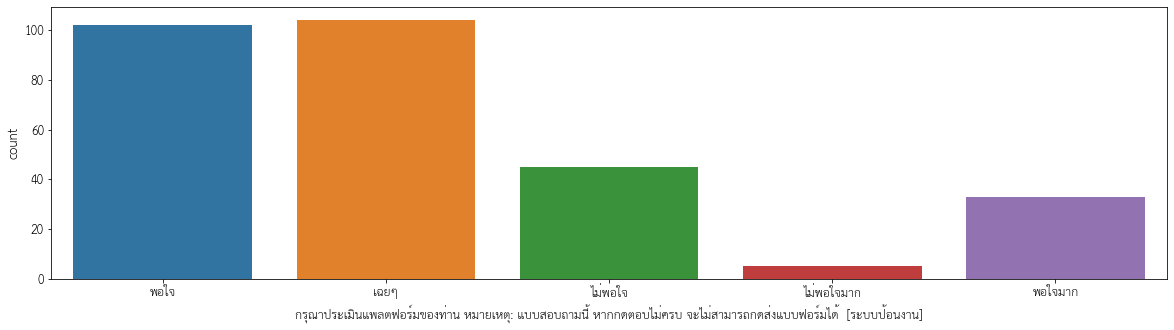

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบป้อนงาน]',data=df_grab)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ความคุ้มค่าของค่าจ้าง]', ylabel='count'>

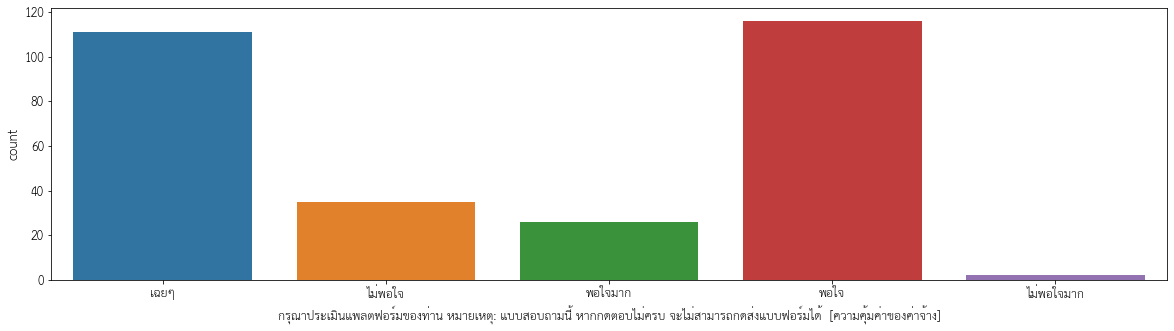

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ความคุ้มค่าของค่าจ้าง]',data=df_grab)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบการจ่ายโบนัส]', ylabel='count'>

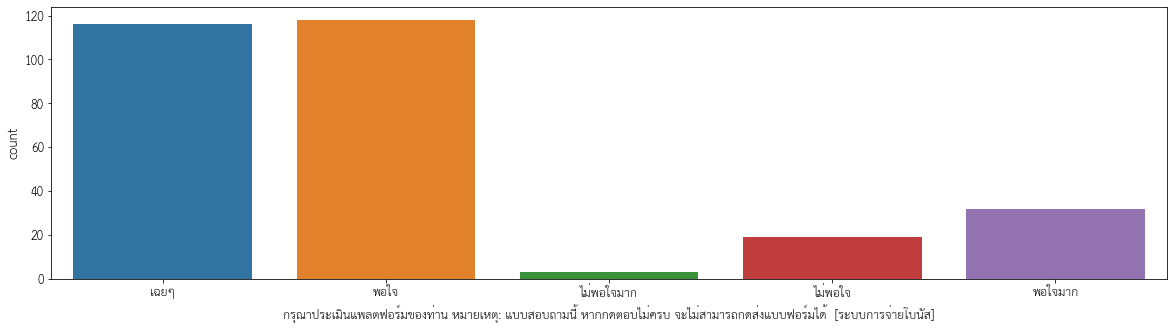

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบการจ่ายโบนัส]',data=df_grab)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย]', ylabel='count'>

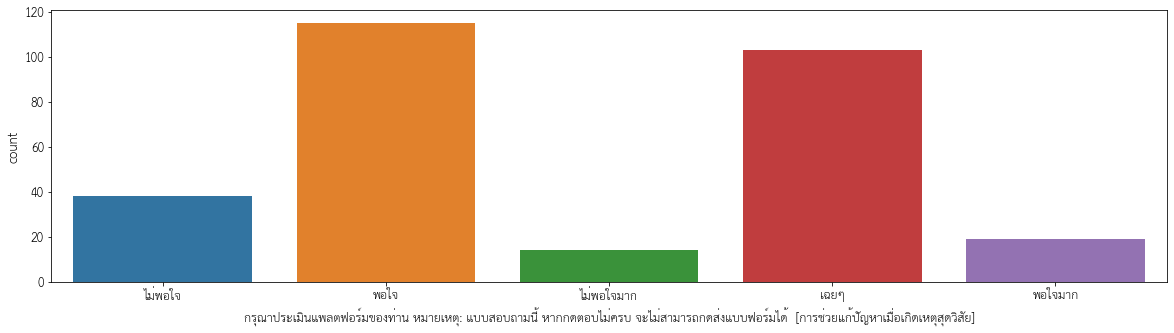

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย]',data=df_grab)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน]', ylabel='count'>

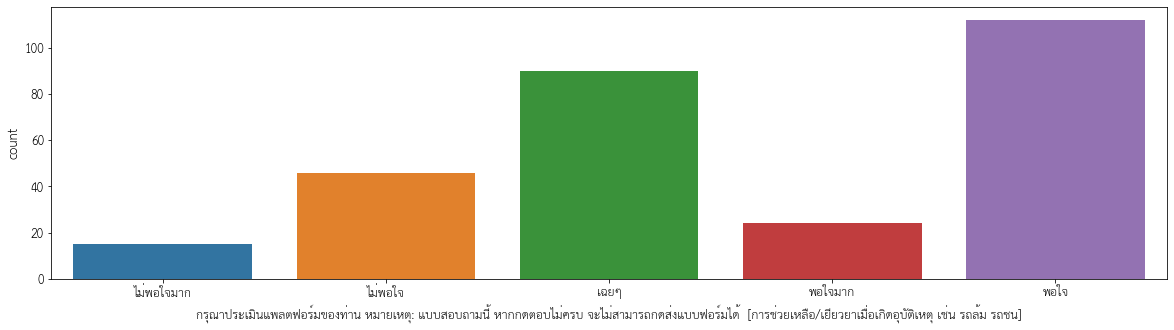

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน]',data=df_grab)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การแบ่งโซนรับงาน]', ylabel='count'>

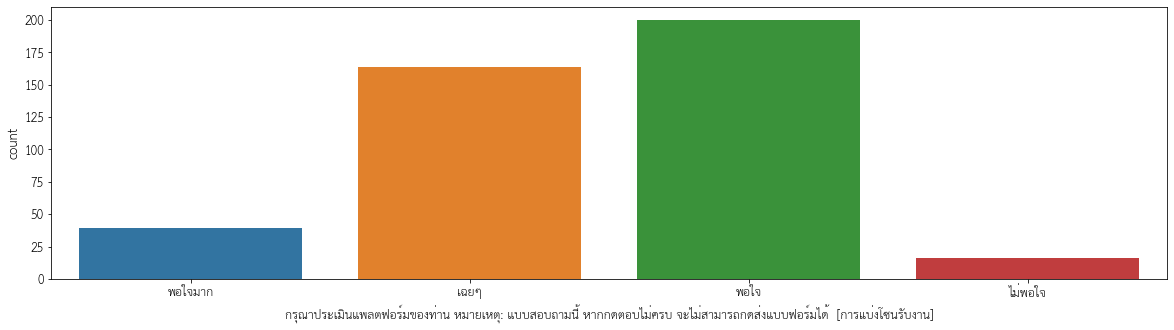

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การแบ่งโซนรับงาน]',data=df_foodpanda)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การให้ค่ารอบมาก-น้อยตามพื้นที่]', ylabel='count'>

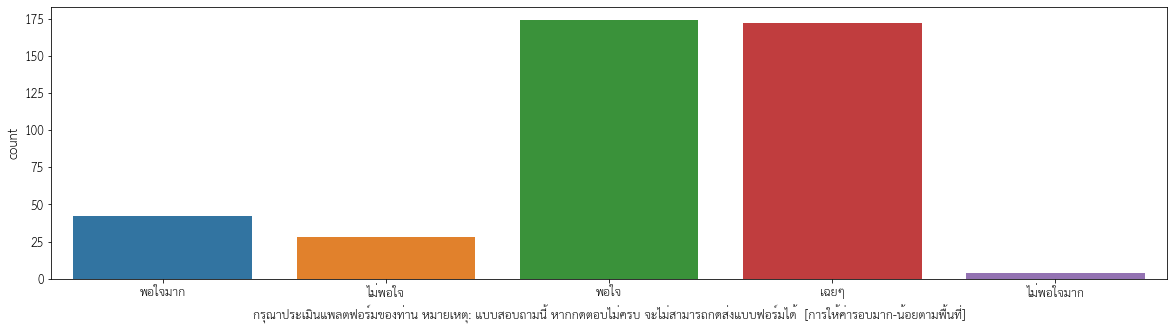

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การให้ค่ารอบมาก-น้อยตามพื้นที่]',data=df_foodpanda)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบเลื่อนขั้น]', ylabel='count'>

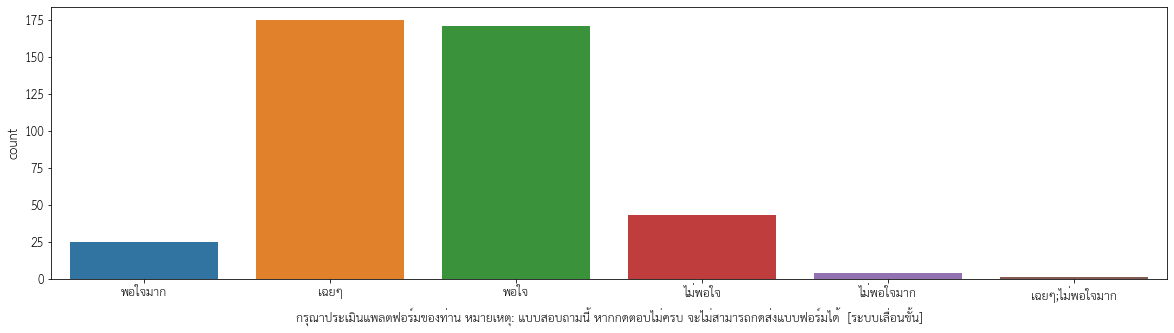

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบเลื่อนขั้น]',data=df_foodpanda)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบป้อนงาน]', ylabel='count'>

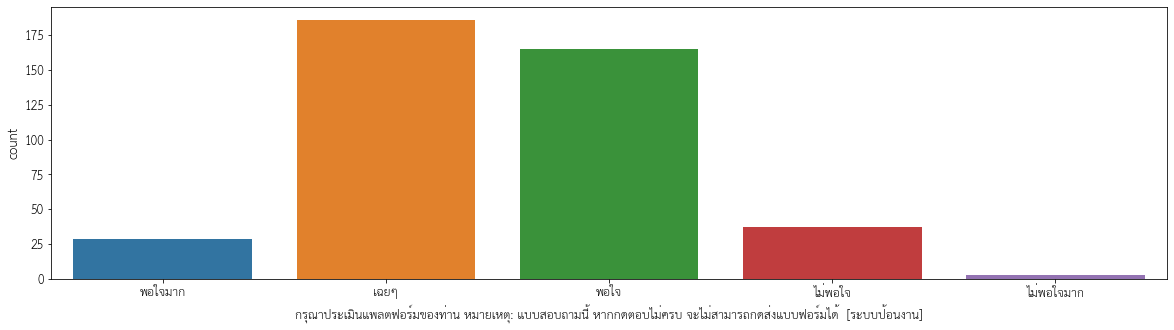

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบป้อนงาน]',data=df_foodpanda)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ความคุ้มค่าของค่าจ้าง]', ylabel='count'>

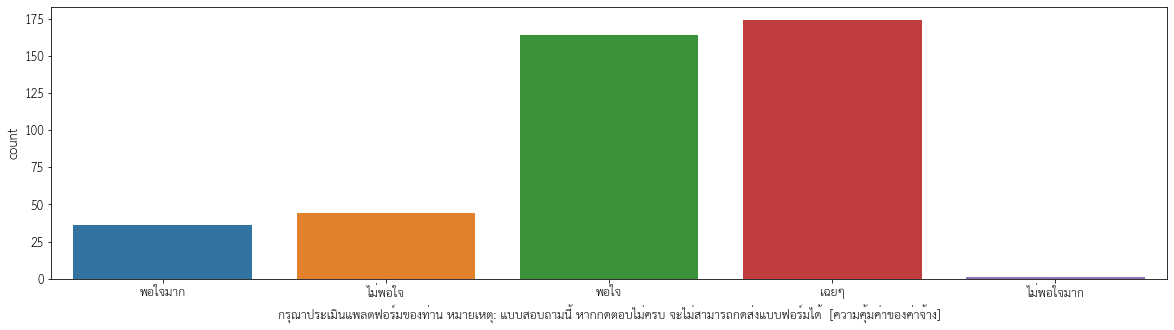

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ความคุ้มค่าของค่าจ้าง]',data=df_foodpanda)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบการจ่ายโบนัส]', ylabel='count'>

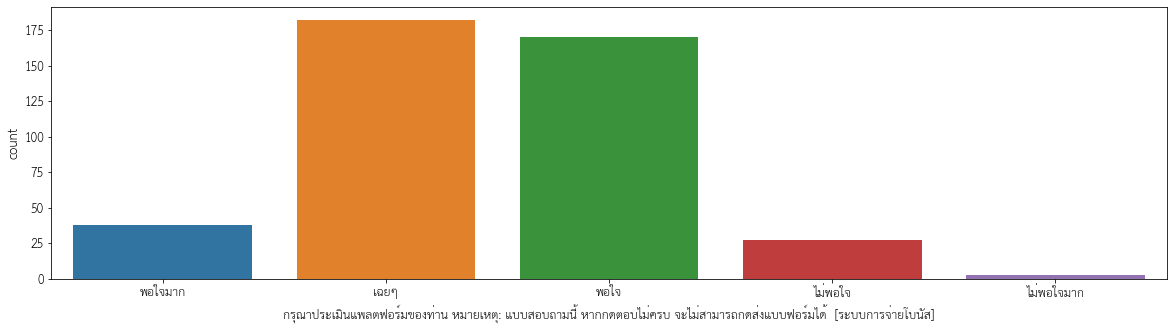

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบการจ่ายโบนัส]',data=df_foodpanda)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย]', ylabel='count'>

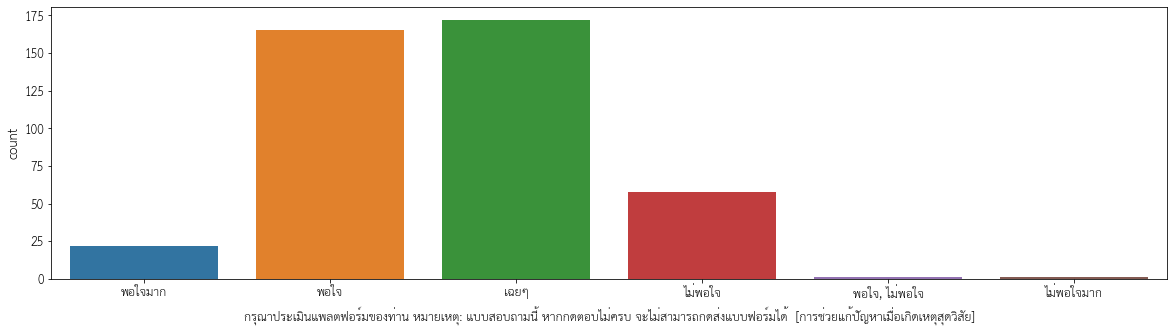

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย]',data=df_foodpanda)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน]', ylabel='count'>

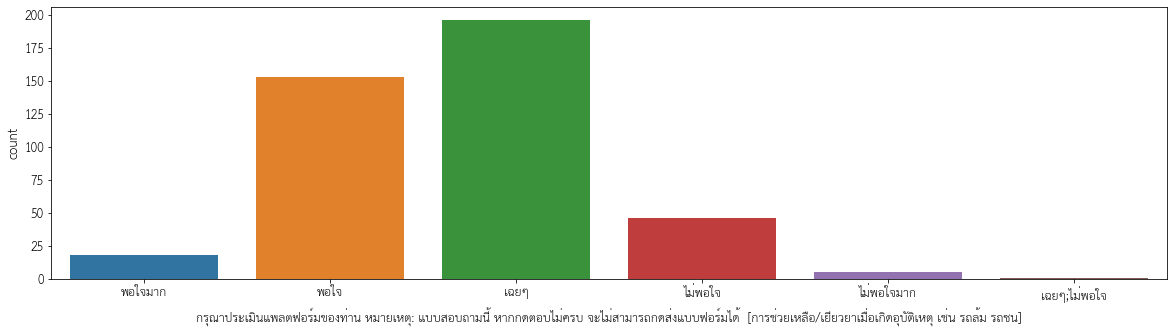

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน]',data=df_foodpanda)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การแบ่งโซนรับงาน]', ylabel='count'>

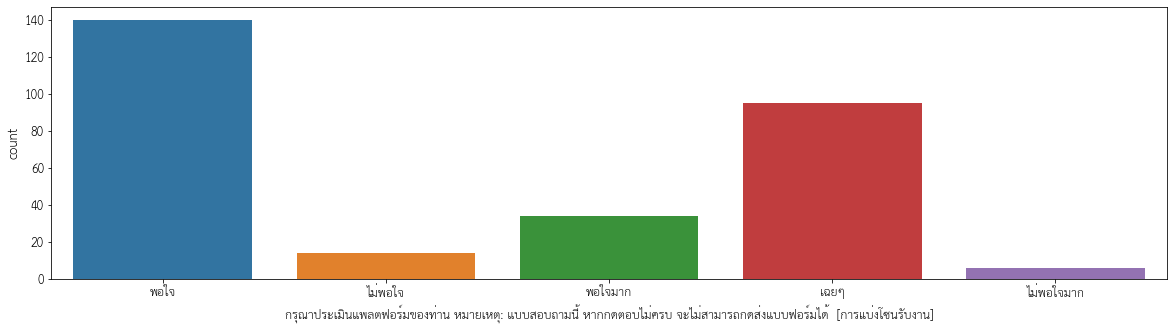

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การแบ่งโซนรับงาน]',data=df_lineman)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การให้ค่ารอบมาก-น้อยตามพื้นที่]', ylabel='count'>

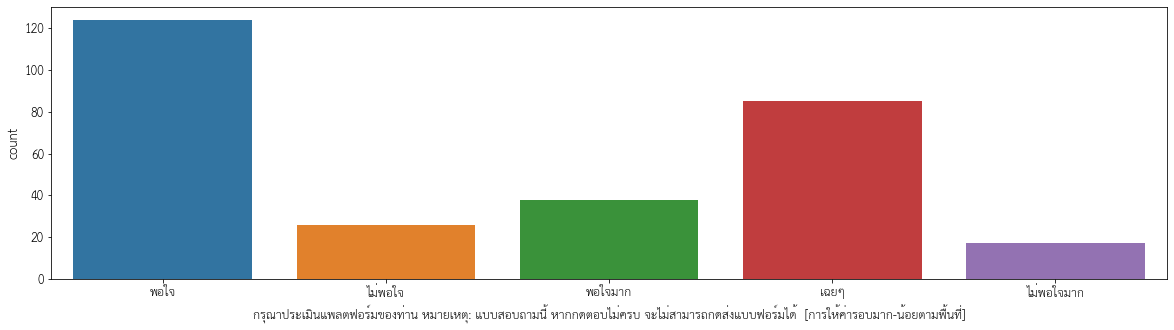

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การให้ค่ารอบมาก-น้อยตามพื้นที่]',data=df_lineman)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบเลื่อนขั้น]', ylabel='count'>

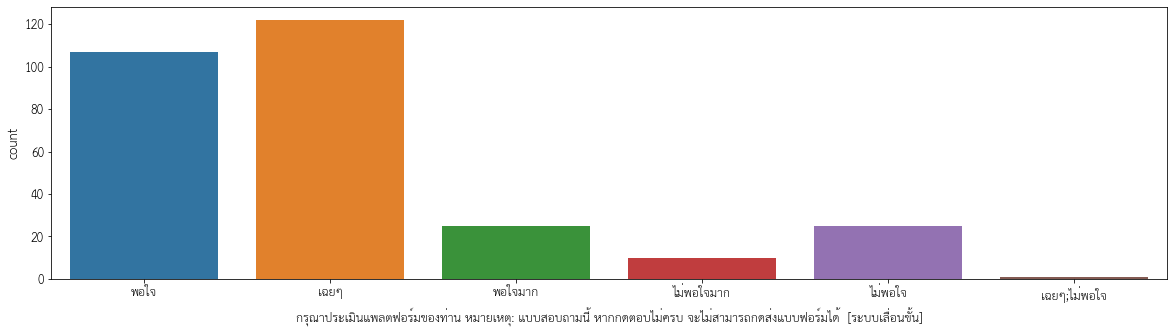

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบเลื่อนขั้น]',data=df_lineman)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบป้อนงาน]', ylabel='count'>

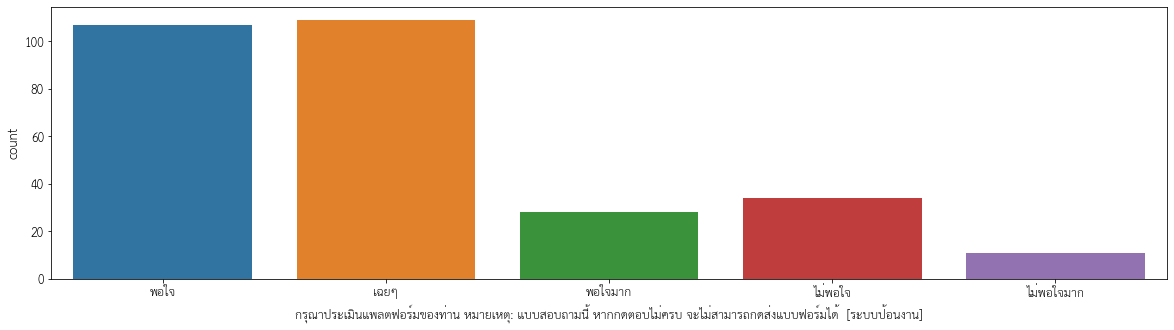

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบป้อนงาน]',data=df_lineman)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ความคุ้มค่าของค่าจ้าง]', ylabel='count'>

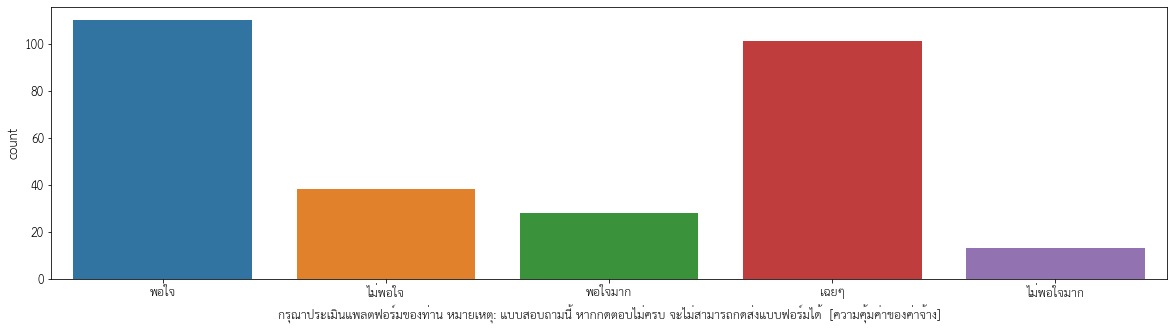

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ความคุ้มค่าของค่าจ้าง]',data=df_lineman)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบการจ่ายโบนัส]', ylabel='count'>

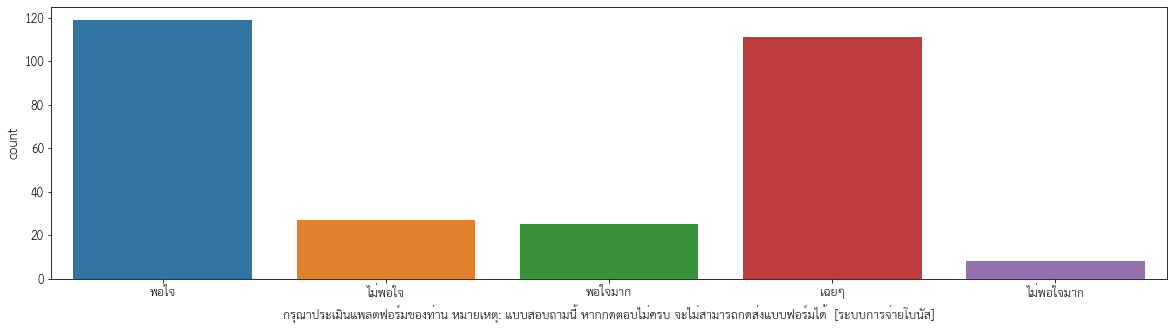

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบการจ่ายโบนัส]',data=df_lineman)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย]', ylabel='count'>

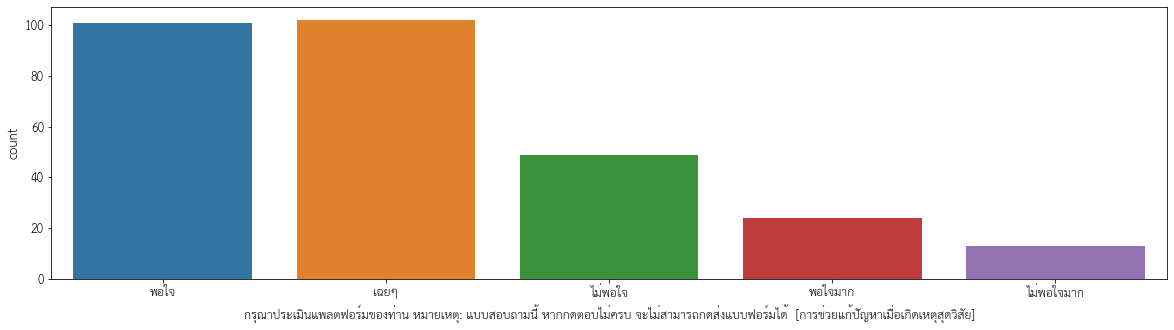

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย]',data=df_lineman)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน]', ylabel='count'>

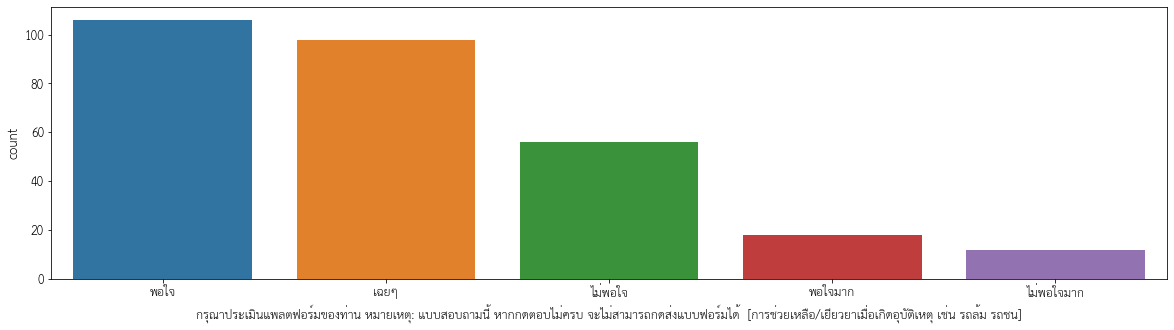

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน]',data=df_lineman)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การแบ่งโซนรับงาน]', ylabel='count'>

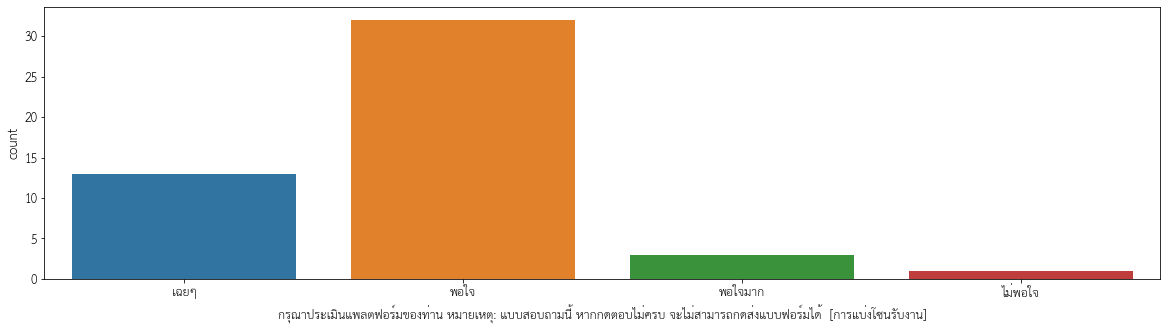

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การแบ่งโซนรับงาน]',data=df_gojek)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การให้ค่ารอบมาก-น้อยตามพื้นที่]', ylabel='count'>

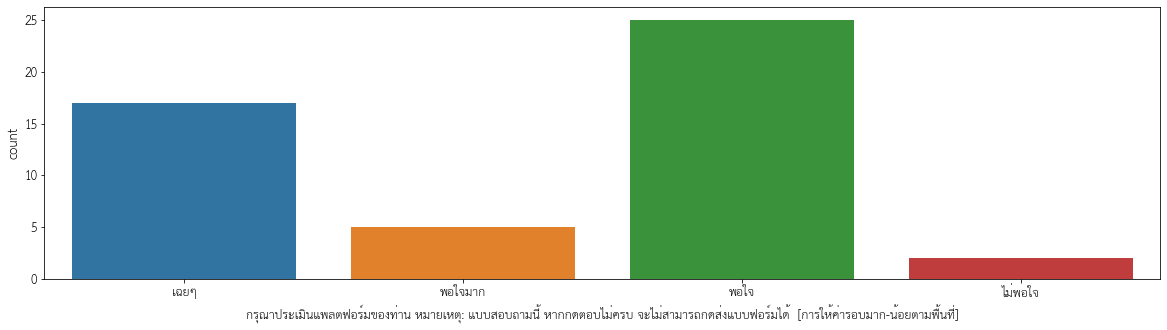

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การให้ค่ารอบมาก-น้อยตามพื้นที่]',data=df_gojek)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบเลื่อนขั้น]', ylabel='count'>

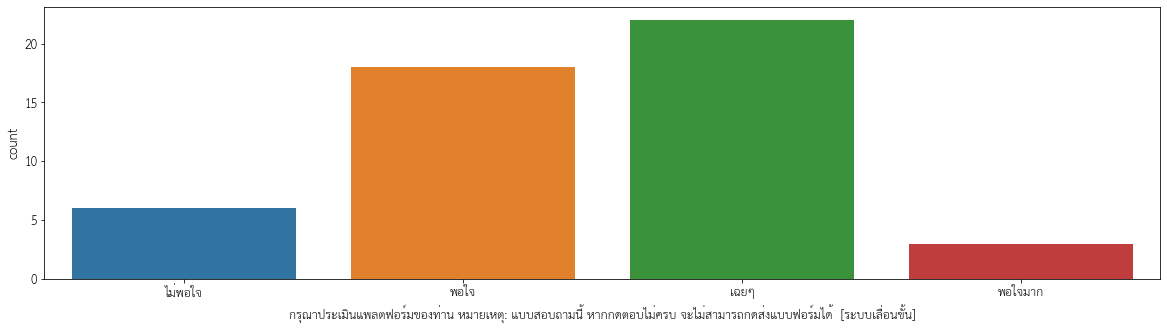

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบเลื่อนขั้น]',data=df_gojek)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบป้อนงาน]', ylabel='count'>

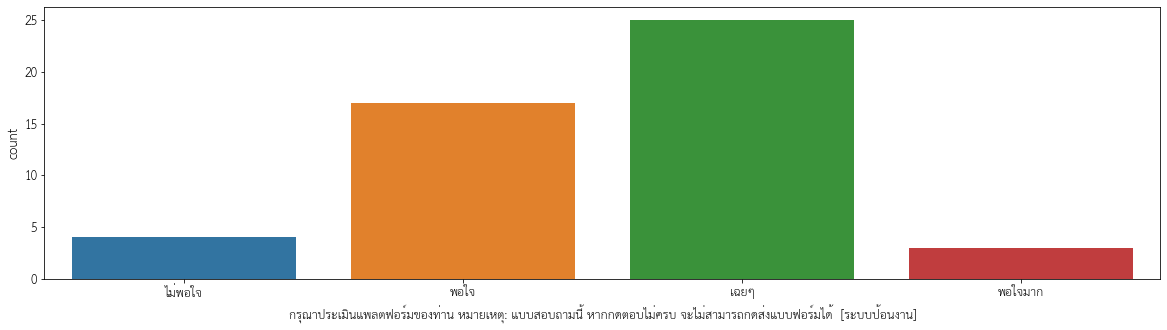

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบป้อนงาน]',data=df_gojek)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ความคุ้มค่าของค่าจ้าง]', ylabel='count'>

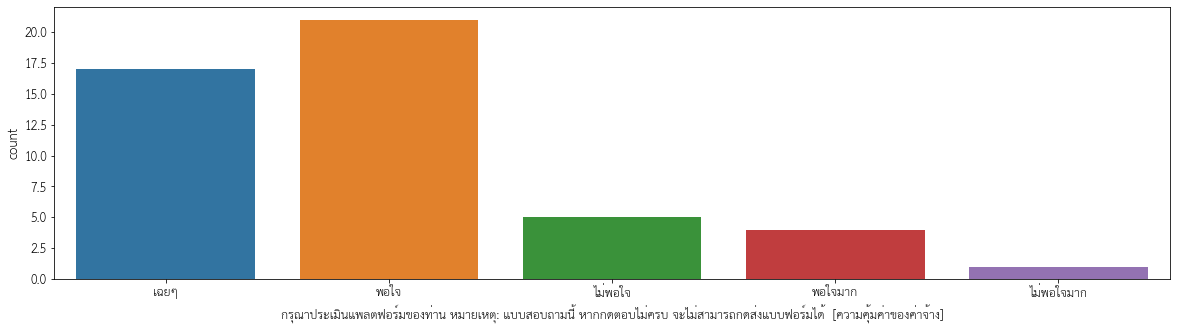

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ความคุ้มค่าของค่าจ้าง]',data=df_gojek)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบการจ่ายโบนัส]', ylabel='count'>

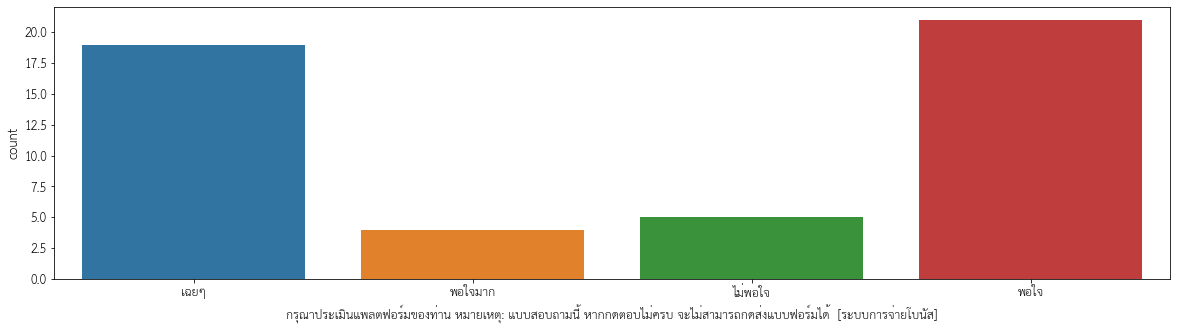

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบการจ่ายโบนัส]',data=df_gojek)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย]', ylabel='count'>

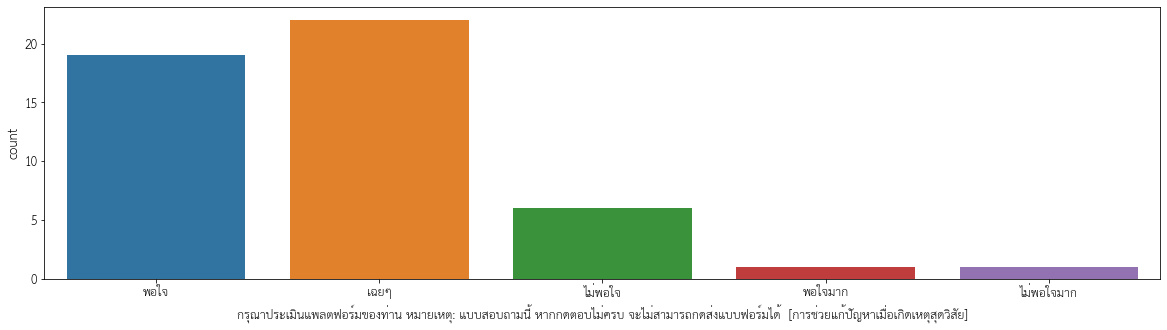

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย]',data=df_gojek)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน]', ylabel='count'>

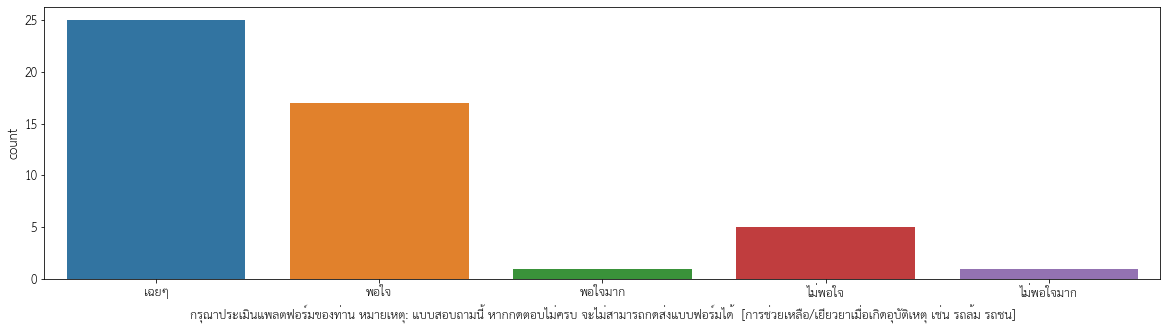

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน]',data=df_gojek)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การแบ่งโซนรับงาน]', ylabel='count'>

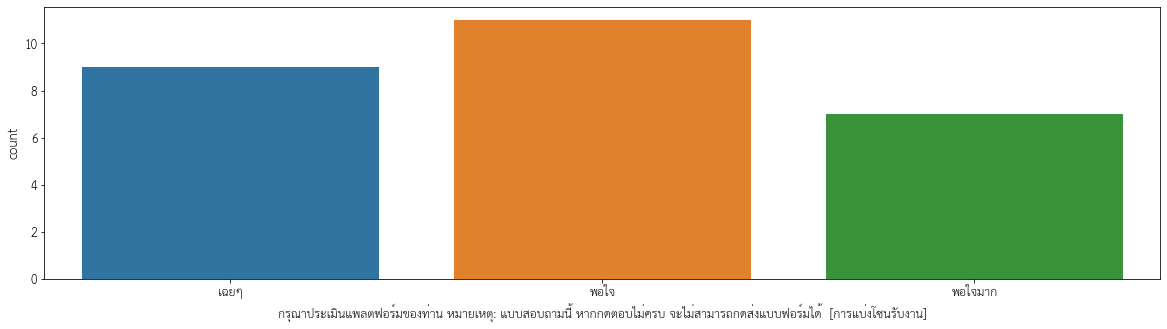

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การแบ่งโซนรับงาน]',data=df_robin)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การให้ค่ารอบมาก-น้อยตามพื้นที่]', ylabel='count'>

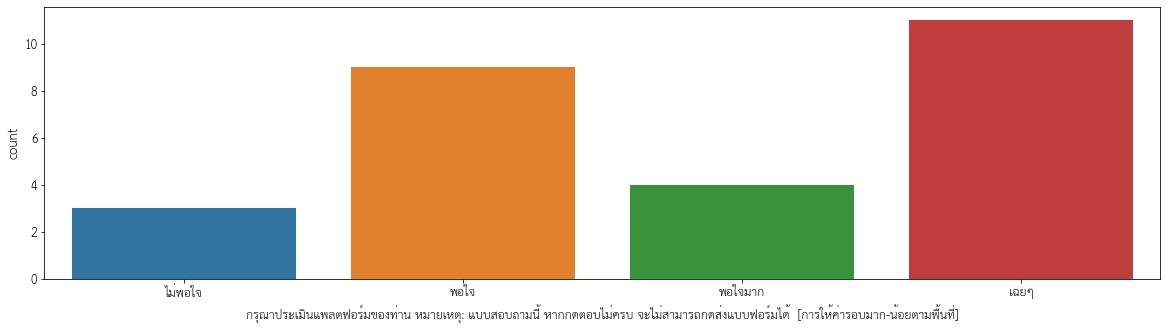

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การให้ค่ารอบมาก-น้อยตามพื้นที่]',data=df_robin)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบเลื่อนขั้น]', ylabel='count'>

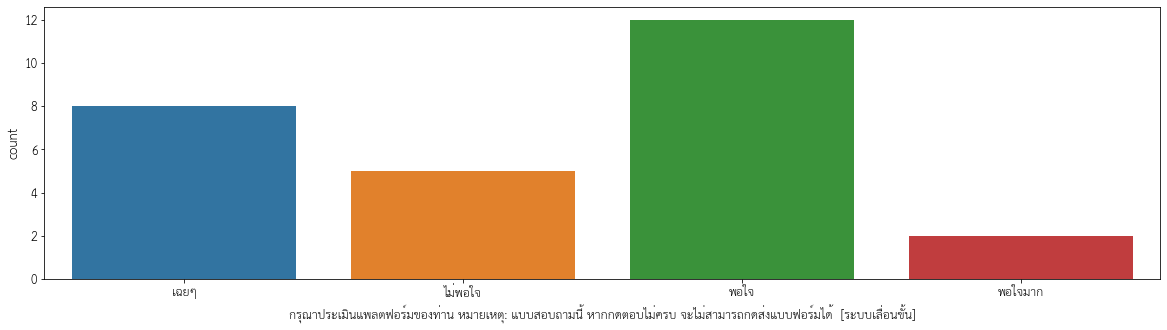

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบเลื่อนขั้น]',data=df_robin)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบป้อนงาน]', ylabel='count'>

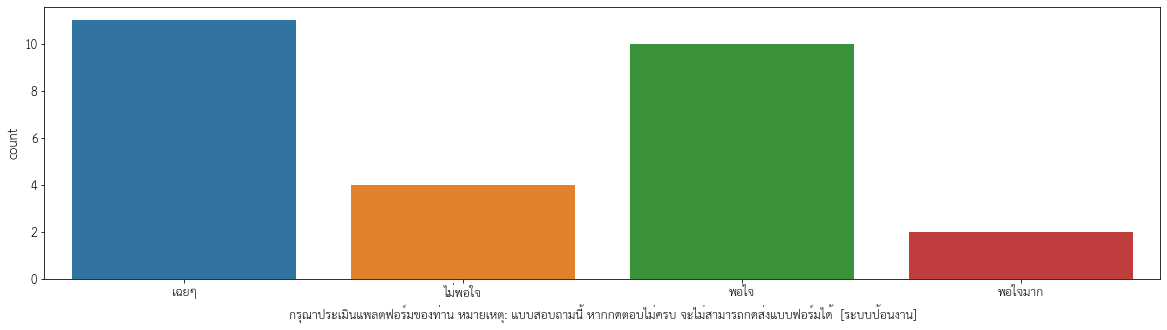

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบป้อนงาน]',data=df_robin)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ความคุ้มค่าของค่าจ้าง]', ylabel='count'>

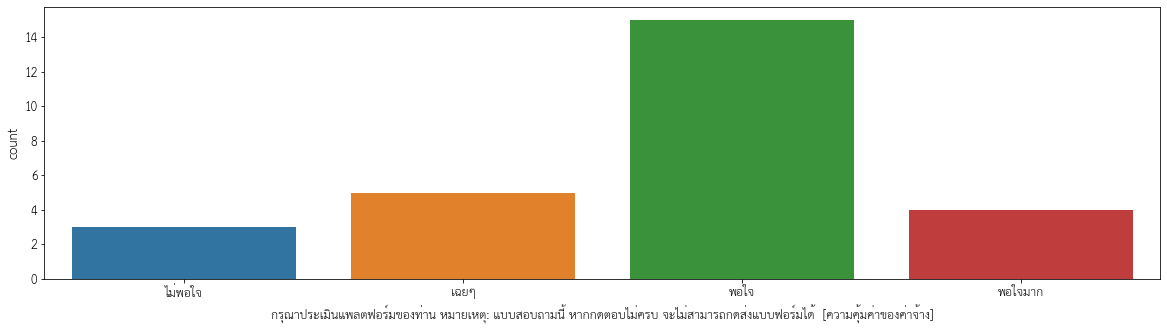

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ความคุ้มค่าของค่าจ้าง]',data=df_robin)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบการจ่ายโบนัส]', ylabel='count'>

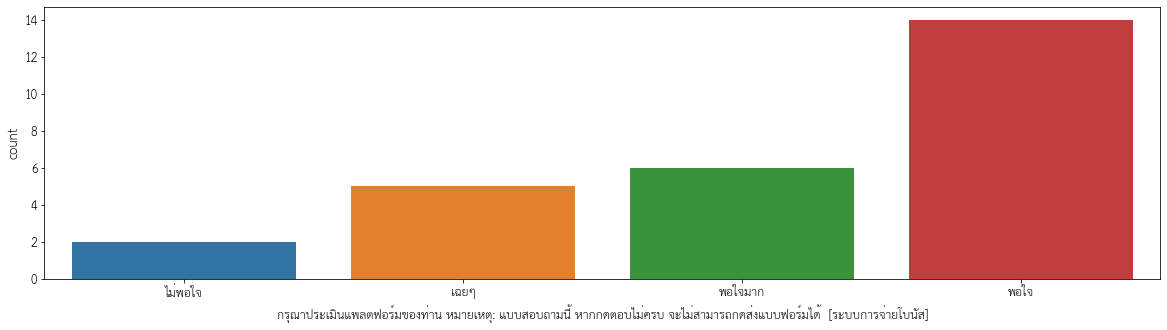

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [ระบบการจ่ายโบนัส]',data=df_robin)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย]', ylabel='count'>

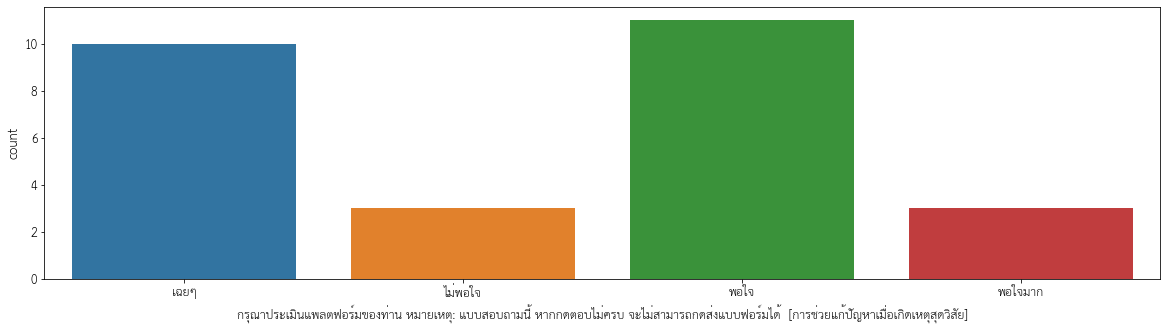

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยแก้ปัญหาเมื่อเกิดเหตุสุดวิสัย]',data=df_robin)

<AxesSubplot:xlabel='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน]', ylabel='count'>

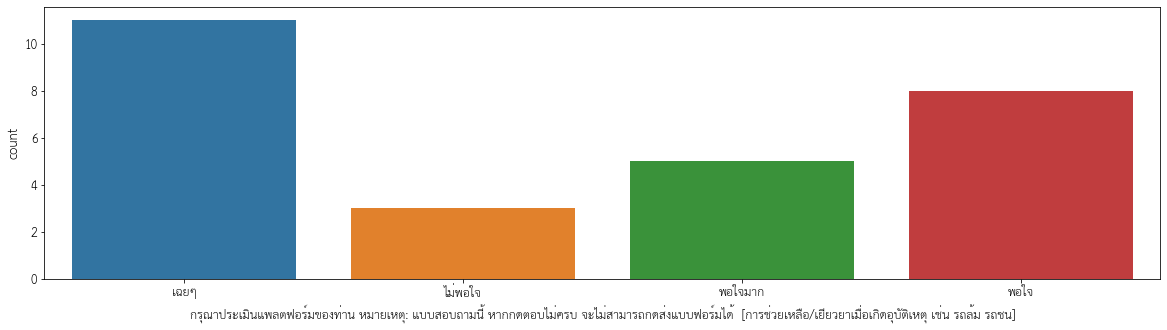

In [ ]:
sns.countplot(x='กรุณาประเมินแพลตฟอร์มของท่าน หมายเหตุ: แบบสอบถามนี้ หากกดตอบไม่ครบ จะไม่สามารถกดส่งแบบฟอร์มได้  [การช่วยเหลือ/เยียวยาเมื่อเกิดอุบัติเหตุ เช่น รถล้ม รถชน]',data=df_robin)